# Assignment_Decision Tree

### Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  <br>


__About the data:__ 
Let’s consider a Company dataset with around 10 variables and 400 records. <br>

The attributes are as follows: <br>
- Sales -- Unit sales (in thousands) at each location<br>
- Competitor Price -- Price charged by competitor at each location<br><br>
- Income -- Community income level (in thousands of dollars)<br>
- Advertising -- Local advertising budget for company at each location (in thousands of dollars)<br>
- Population -- Population size in region (in thousands)<br>
- Price -- Price company charges for car seats at each site<br>
- Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site<br>
- Age -- Average age of the local population<br>
- Education -- Education level at each location<br>
- Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location<br>
- US -- A factor with levels No and Yes to indicate whether the store is in the US or not <br>
 


In [81]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
#!pip install lime
import lime
import lime.lime_tabular

In [82]:
Company_Data=pd.read_csv('Company_Data.csv')
Company_Data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:
#check for missing value and datatype and viewing data through heatmap
def inspection(dataframe):
    import pandas as pd
    import seaborn as sns
    
    print("Data types of variables")
    print(dataframe.dtypes,'\n')
    print("Sample with missing Values:")
    print(dataframe.isnull().any(axis=1).sum(),'\n')
    print("Missing Values per Variable")
    print(dataframe.isnull().sum(),'\n')
    print("Heatmap for bank data having null values:")
    sns.heatmap(dataframe.isnull())

Data types of variables
Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object 

Sample with missing Values:
0 

Missing Values per Variable
Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64 

Heatmap for bank data having null values:


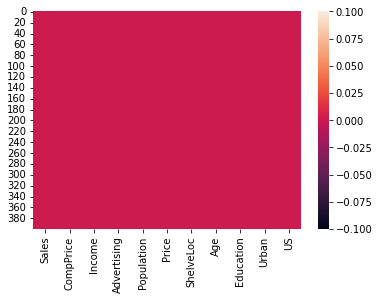

In [4]:
inspection(Company_Data)

__Sales__: float continuos variable<br>
__ShelveLoc, Urban, US__:Object<br>
__Missing__: None

In [83]:
# checking values in sales column
Company_Data['Sales'].describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

In [84]:
# converting Sales to Categorial variable using cut function
Company_Data['SalesPerformance']=pd.cut(Company_Data.Sales,bins=[0,2,7,17],labels=['0','1','2'])
#0: Low sales
#1: Moderate Sales
#2: High Sales
Company_Data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,SalesPerformance
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,2
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,2
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,2
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,2
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes,2
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes,1
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes,2
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes,1


In [7]:
Company_Data['SalesPerformance'].value_counts()

2    216
1    177
0      6
Name: SalesPerformance, dtype: int64

In [8]:
# check if any NA value sin SalesPerformance
Company_Data.isna().any()

Sales               False
CompPrice           False
Income              False
Advertising         False
Population          False
Price               False
ShelveLoc           False
Age                 False
Education           False
Urban               False
US                  False
SalesPerformance     True
dtype: bool

In [9]:
Company_Data=Company_Data.dropna()

In [10]:
Company_Data.shape

(399, 12)

In [11]:
#dropping sales columns as we have SalesPrerformance
Company_Data_excud_sales=Company_Data.drop('Sales',axis=1)
Company_Data_excud_sales

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,SalesPerformance
0,138,73,11,276,120,Bad,42,17,Yes,Yes,2
1,111,48,16,260,83,Good,65,10,Yes,Yes,2
2,113,35,10,269,80,Medium,59,12,Yes,Yes,2
3,117,100,4,466,97,Medium,55,14,Yes,Yes,2
4,141,64,3,340,128,Bad,38,13,Yes,No,1
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,Good,33,14,Yes,Yes,2
396,139,23,3,37,120,Medium,55,11,No,Yes,1
397,162,26,12,368,159,Medium,40,18,Yes,Yes,2
398,100,79,7,284,95,Bad,50,12,Yes,Yes,1


In [12]:
Company_Data_excud_sales['SalesPerformance']=Company_Data_excud_sales['SalesPerformance'].astype('object')

In [13]:
# listing columns with datatype as object
cat_columns = Company_Data_excud_sales.select_dtypes(['object']).columns
cat_columns

Index(['ShelveLoc', 'Urban', 'US', 'SalesPerformance'], dtype='object')

In [14]:
#check unique values for columns
def unique_values(dataframe,variables):
    for v in variables:
        print(v)
        print(" uniques values for Variable: ",v)
        print( dataframe[v].unique(),"\n")

In [15]:
unique_values(Company_Data_excud_sales,cat_columns)

ShelveLoc
 uniques values for Variable:  ShelveLoc
['Bad' 'Good' 'Medium'] 

Urban
 uniques values for Variable:  Urban
['Yes' 'No'] 

US
 uniques values for Variable:  US
['Yes' 'No'] 

SalesPerformance
 uniques values for Variable:  SalesPerformance
['2' '1' '0'] 



In [16]:
Company_Data_excud_sales[cat_columns] = Company_Data_excud_sales[cat_columns].apply(lambda x: pd.factorize(x)[0])
Company_Data_excud_sales.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,SalesPerformance
0,138,73,11,276,120,0,42,17,0,0,0
1,111,48,16,260,83,1,65,10,0,0,0
2,113,35,10,269,80,2,59,12,0,0,0
3,117,100,4,466,97,2,55,14,0,0,0
4,141,64,3,340,128,0,38,13,0,1,1


1 row was dropped

In [85]:
x_entropy=Company_Data_excud_sales.iloc[:,0:10]
y_entropy=Company_Data_excud_sales.iloc[:,10]

In [86]:
x_entropy

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,0,0
1,111,48,16,260,83,1,65,10,0,0
2,113,35,10,269,80,2,59,12,0,0
3,117,100,4,466,97,2,55,14,0,0
4,141,64,3,340,128,0,38,13,0,1
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,0,0
396,139,23,3,37,120,2,55,11,1,0
397,162,26,12,368,159,2,40,18,0,0
398,100,79,7,284,95,0,50,12,0,0


In [87]:
y_entropy

0      0
1      0
2      0
3      0
4      1
      ..
395    0
396    1
397    0
398    1
399    0
Name: SalesPerformance, Length: 399, dtype: int64

In [88]:
Company_Data_excud_sales['SalesPerformance'].unique()

array([0, 1, 2], dtype=int64)

In [93]:
# Splitting data into training and testing data set
x_train_ent, x_test_ent,y_train_ent,y_test_ent = train_test_split(x_entropy,y_entropy, test_size=0.2,random_state=40)

In [94]:
#x_train_ent
x_train_ent

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
279,141,57,13,376,158,2,64,18,0,0
0,138,73,11,276,120,0,42,17,0,0
146,114,83,0,412,131,0,39,14,0,1
265,130,35,10,402,129,0,39,17,0,0
291,118,70,0,106,89,0,39,17,0,1
...,...,...,...,...,...,...,...,...,...,...
307,138,92,0,13,120,0,61,12,0,1
165,147,58,7,100,191,0,27,15,0,0
7,136,81,15,425,120,1,67,10,0,0
220,131,120,15,262,124,2,30,10,0,0


In [95]:
#x_test_ent
x_test_ent

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
142,124,84,0,300,104,2,77,15,0,1
135,96,94,14,384,120,2,36,18,1,0
77,118,71,12,44,89,2,67,18,1,0
247,123,114,0,298,151,0,34,16,0,1
118,112,88,2,243,99,2,62,11,0,0
...,...,...,...,...,...,...,...,...,...,...
198,112,80,5,500,128,2,69,10,0,0
326,133,30,0,152,122,2,53,17,0,1
375,132,46,4,206,124,2,73,11,0,1
287,95,44,4,208,72,0,44,17,0,0


In [96]:
#y_train_ent
y_test_ent

142    0
135    1
77     0
247    1
118    0
      ..
198    1
326    1
375    0
287    1
350    0
Name: SalesPerformance, Length: 80, dtype: int64

In [97]:
x_train_ent.shape

(319, 10)

In [98]:
y_train_ent.shape

(319,)

In [99]:
x_test_ent.shape

(80, 10)

In [100]:
y_test_ent.shape

(80,)

### Building Decision Tree Classifier using Entropy Criteria

In [101]:
model_entropy = DecisionTreeClassifier(criterion = 'entropy',max_depth=5)
model_entropy.fit(x_train_ent,y_train_ent)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

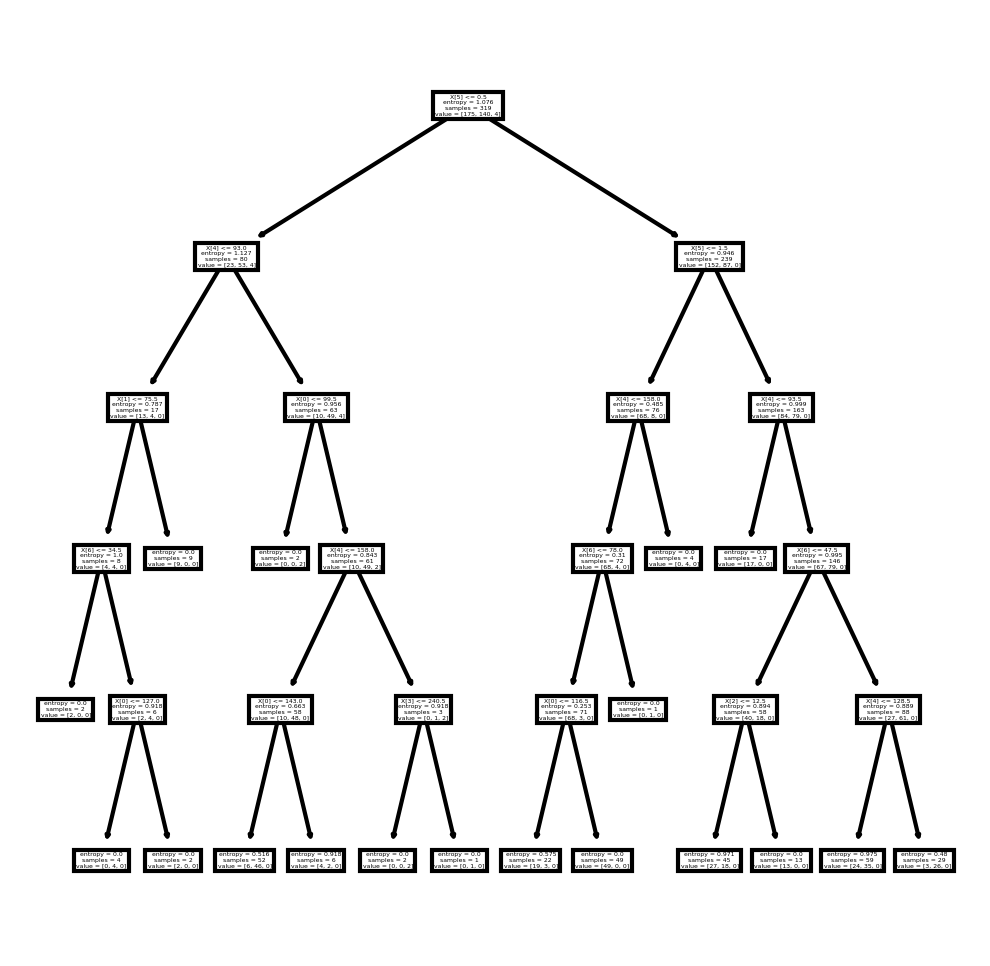

In [102]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
#PLot the decision tree
tree.plot_tree(model_entropy);

In [103]:
colnames = list(Company_Data_excud_sales.columns)
colnames

['CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US',
 'SalesPerformance']

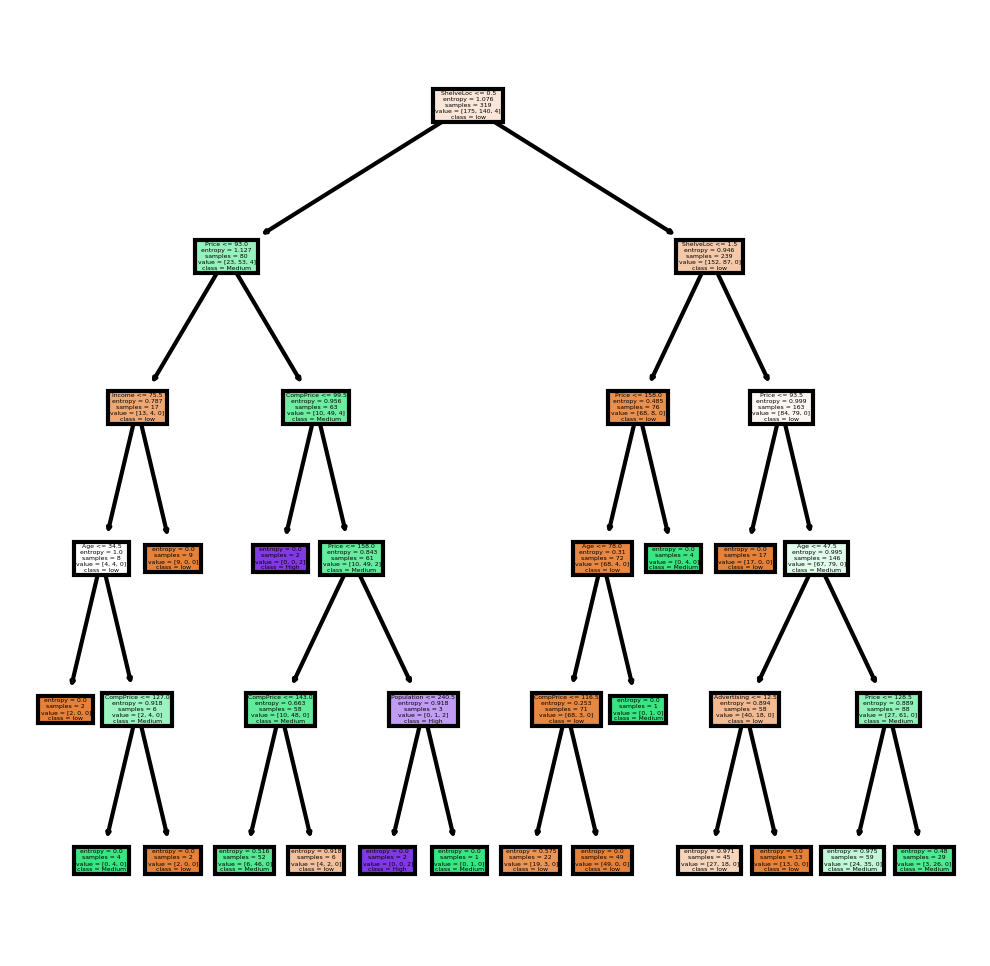

In [104]:
fn=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US',]
cn=['low','Medium','High']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)    #dpi= dots per inch
tree.plot_tree(model_entropy,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [105]:
#0 label = low
#1 label = Medium
#2 label = High

#Predicting on test data
preds = model_entropy.predict(x_test_ent) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

1    44
0    36
dtype: int64

In [106]:
preds

array([1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0], dtype=int64)

In [107]:
pd.crosstab(y_test_ent,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1
SalesPerformance,,
0,30,11
1,6,31
2,0,2


In [108]:
# Accuracy 
np.mean(preds==y_test_ent)

0.7625

### Building Decision Tree Classifier (CART) using Gini Criteria

In [36]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [37]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [38]:
#Prediction and computing the accuracy
preds=model_gini.predict(x_test)
np.mean(preds==y_test)

0.6625

#### Decision Tree Regression Example

In [92]:
Company_Data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,SalesPerformance
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,2
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,2
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,2
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,2
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes,2
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes,1
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes,2
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes,1


In [40]:
cat_columns = Company_Data.select_dtypes(['object']).columns
cat_columns

Index(['ShelveLoc', 'Urban', 'US'], dtype='object')

In [41]:
Company_Data[cat_columns] = Company_Data[cat_columns].apply(lambda x: pd.factorize(x)[0])
Company_Data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,SalesPerformance
0,9.50,138,73,11,276,120,0,42,17,0,0,2
1,11.22,111,48,16,260,83,1,65,10,0,0,2
2,10.06,113,35,10,269,80,2,59,12,0,0,2
3,7.40,117,100,4,466,97,2,55,14,0,0,2
4,4.15,141,64,3,340,128,0,38,13,0,1,1


In [42]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [43]:
array = Company_Data.values
X_Reg = array[:,1:10]
Y_Reg = array[:,0]

In [44]:
#Independent Variables
X_Reg

array([[138, 73, 11, ..., 42, 17, 0],
       [111, 48, 16, ..., 65, 10, 0],
       [113, 35, 10, ..., 59, 12, 0],
       ...,
       [162, 26, 12, ..., 40, 18, 0],
       [100, 79, 7, ..., 50, 12, 0],
       [134, 37, 0, ..., 49, 16, 0]], dtype=object)

In [45]:
# Dependent Variable
Y_Reg

array([9.5, 11.22, 10.06, 7.4, 4.15, 10.81, 6.63, 11.85, 6.54, 4.69, 9.01,
       11.96, 3.98, 10.96, 11.17, 8.71, 7.58, 12.29, 13.91, 8.73, 6.41,
       12.13, 5.08, 5.87, 10.14, 14.9, 8.33, 5.27, 2.99, 7.81, 13.55,
       8.25, 6.2, 8.77, 2.67, 11.07, 8.89, 4.95, 6.59, 3.24, 2.07, 7.96,
       10.43, 4.12, 4.16, 4.56, 12.44, 4.38, 3.91, 10.61, 1.42, 4.42,
       7.91, 6.92, 4.9, 6.85, 11.91, 0.91, 5.42, 5.21, 8.32, 7.32, 1.82,
       8.47, 7.8, 4.9, 8.85, 9.01, 13.39, 7.99, 9.46, 6.5, 5.52, 12.61,
       6.2, 8.55, 10.64, 7.7, 4.43, 9.14, 8.01, 7.52, 11.62, 4.42, 2.23,
       8.47, 8.7, 11.7, 6.56, 7.95, 5.33, 4.81, 4.53, 8.86, 8.39, 5.58,
       9.48, 7.45, 12.49, 4.88, 4.11, 6.2, 5.3, 5.07, 4.62, 5.55, 0.16,
       8.55, 3.47, 8.98, 9.0, 6.62, 6.67, 6.01, 9.31, 8.54, 5.08, 8.8,
       7.57, 7.37, 6.87, 11.67, 6.88, 8.19, 8.87, 9.34, 11.27, 6.52, 4.96,
       4.47, 8.41, 6.5, 9.54, 7.62, 3.67, 6.44, 5.17, 6.52, 10.27, 12.3,
       6.03, 6.53, 7.44, 0.53, 9.09, 8.77, 3.9, 10.51, 7.56

In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(X_Reg, Y_Reg, test_size=0.33, random_state=1)

In [80]:
type(X_train)

pandas.core.frame.DataFrame

In [47]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(267, 9)
(132, 9)
(267,)
(132,)


In [48]:
model_Regressor = DecisionTreeRegressor()
model_Regressor.fit(X_train, Y_train)

DecisionTreeRegressor()

In [49]:
model_Regressor.score(X_train, Y_train)

1.0

In [50]:
#Find the accuracy
model_Regressor.score(X_test,Y_test)

0.33643829728721253

# Feature analysis

In [51]:
# define a function for plotting the feature importances
def plot_feature_importances(model):
    feature_importances = pd.Series(model.feature_importances_, index=model.feature_names_in_)
    feature_importances = feature_importances.sort_values(axis=0, ascending=False)
    fig, ax = plt.subplots()
    feature_importances.plot.bar()
    ax.set_title("Feature importances")
    fig.tight_layout()

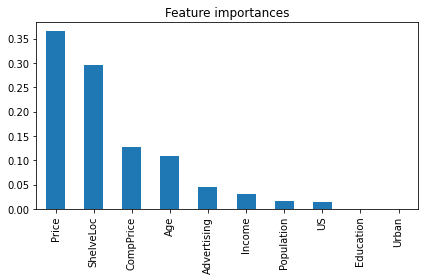

In [52]:
# feature importances for decision tree model
plot_feature_importances(model_entropy)

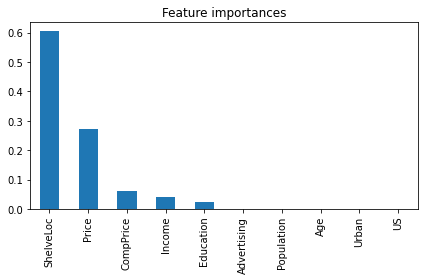

In [53]:
plot_feature_importances(model_gini)

__Features leading to Sales Increase__
1. ShelveLoc (Shelve Location) : Proper Shelve location of product in store does results increase of sales.
2. Price and CompPrice:  Price in rationle to competitive price
3. ADversing: Though in entropy model is as 5th Important feature, however it should be considered as key factor to increasing sales.
4. Urban or not does not have relevence in sales increase as depicted by both models.